## Inserting the scripts directory into the Python module search path

In [1]:
import sys
sys.path.insert(0, '../scripts/')


In [2]:
import matplotlib.pyplot as plt
import os
import numpy_image_manipulation as manipulate
import numpy as np

## load the image into a numpy array and print the image

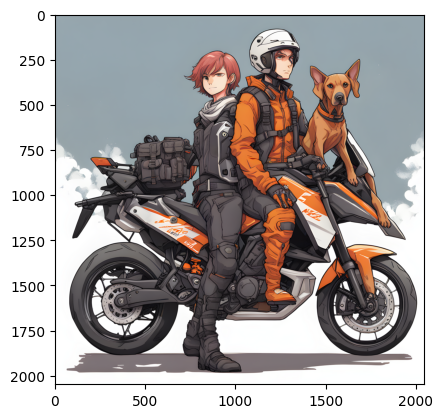

In [4]:
picture_to_play_with = 'lala'
directory_input_img = os.path.join('..', 'data', 'input', f'{picture_to_play_with}.png')
initial_image = manipulate.image_read_from_file(directory_input_img)
plt.imshow(initial_image)
plt.show()

## create tiles of my image

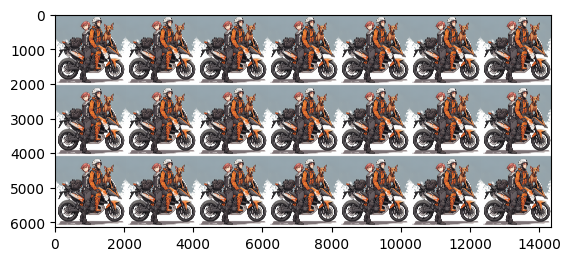

In [5]:
grid = [[0 for i in range(7)] for j in range(3)]
tiled_image_2 = manipulate.image_matrix_with_alterations(initial_image, flip_matrix=grid)

plt.imshow(tiled_image_2)
plt.show()

## Create a grid in which I can define with an integer value how the images should be flipped

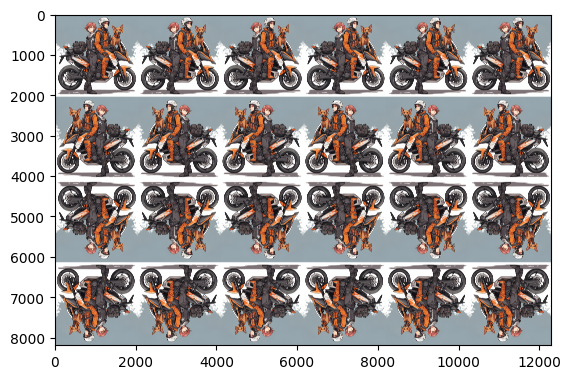

In [12]:
flip_grid = [[i] * 6 for i in range(4)]
grid = manipulate.image_matrix_with_alterations(initial_image, flip_matrix=flip_grid)

plt.imshow(grid)
plt.show()



## Create beautiful grid with colored border tiles and large inner tile

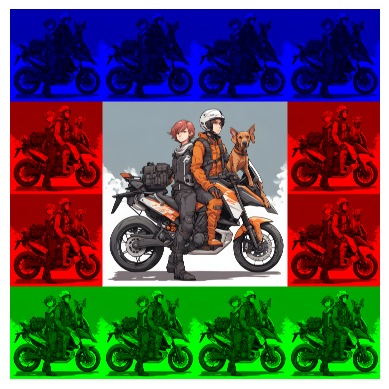

In [16]:
color_matrix = manipulate.create_color_matrix_from_border_list(['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'])
image_matrix = manipulate.create_colorful_big_one(initial_image, color_matrix=color_matrix)

plt.imshow(image_matrix)
plt.axis('off')
plt.show()


## combining previously used functions to create a beautiful grid with a flipped center

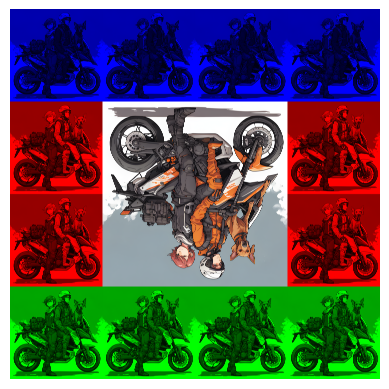

In [17]:
upside_down = manipulate.image_flip(initial_image, "y")

color_matrix = manipulate.create_color_matrix_from_border_list(['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'])
flip_matrix = [[2] * 4 for _ in range(4)]

image_matrix = manipulate.create_colorful_big_one(upside_down, flip_matrix=flip_matrix, color_matrix=color_matrix)

plt.imshow(image_matrix)
plt.axis('off')
plt.show()

## Create a specific color matrix and a flip matrix

In [20]:
def create_color_and_flip_matrix(side_length, color_options):

    color_list = [color_options[i%len(color_options)] for i in range((side_length - 1) * 4)]
    color_matrix = manipulate.create_color_matrix_from_border_list(color_list)
    flip_matrix = np.zeros((side_length, side_length), dtype=int)

    flip_matrix[0, 0:(side_length//2)] = 1
    flip_matrix[side_length-1, 0:(side_length//2)] = 3
    flip_matrix[side_length-1, (side_length//2):(side_length)] = 2
    flip_matrix[1:side_length-1, 0] = 1

    return color_matrix, flip_matrix

## Combining all possibilities by using the previously created color matrix and flop matrix

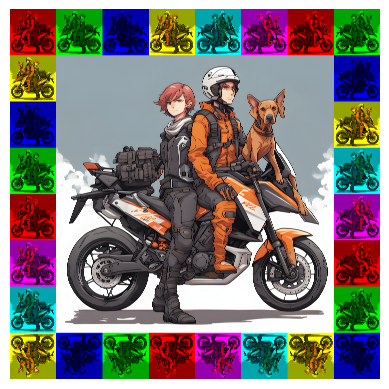

In [21]:
color_options = ['r', 'g', 'b', 'y', 'c', "m"]
side_length = 8 
color_matrix, flip_matrix = create_color_and_flip_matrix(side_length=side_length, color_options=color_options)

image_matrix = manipulate.create_colorful_big_one(initial_image, flip_matrix=flip_matrix, color_matrix=color_matrix)

plt.imshow(image_matrix)
plt.axis('off')
plt.show()


## same as previously but with a scrambled center image

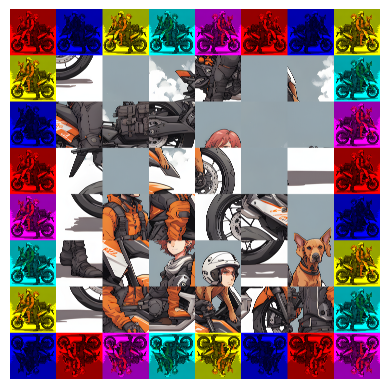

In [22]:
color_options = ['r', 'b', 'y', 'c', "m"]
side_length = 8 
color_matrix, flip_matrix = create_color_and_flip_matrix(side_length=side_length, color_options=color_options)

image_matrix = manipulate.create_colorful_big_one(initial_image, scramble_center=True, flip_matrix=flip_matrix, color_matrix=color_matrix)

plt.imshow(image_matrix)
plt.axis('off')
plt.show()